In [247]:
import numpy as np
import pandas as pd

## Exploratory Data Analysis 

In [248]:
data = pd.read_csv("./ifood_df.csv")
data.head()
#data.info()
#data.shape

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


### Check  or doubled Data

In [249]:
missing_values = data.isna().sum()
#print(missing_values)

In [250]:
duplicates = data.duplicated()
data_no_dup = data.drop_duplicates()

# Assuming your DataFrame is called 'data'
columns_to_exclude = ['Z_CostContact', 'Z_Revenue']

# Drop the specified columns from the DataFrame
data = data_no_dup.drop(columns=columns_to_exclude)

### Check statistics of the Data

In [251]:
numeric_summary= data.describe()
#print(numeric_summary)
#print(data.columns)

# Categorical Variables
binary_categorical_vars = ['Kidhome', 'Teenhome', 'Complain', 'marital_Married', 'marital_Single','marital_Divorced','marital_Together','marital_Widow',
                           'education_Graduation', 'education_Master', 'education_PhD','Response','education_2n Cycle','education_Basic','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmpOverall']

# Numerical Variables
numerical_vars = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 
                  'MntTotal', 'MntRegularProds']

# Calculate the range for each numerical column
range_values = {}
for var in numerical_vars:
    range_values[var] = data[var].max() - data[var].min()

print("Range for each numerical column:")
for var, range_val in range_values.items():
    print(f"{var}: {range_val}")

Range for each numerical column:
Income: 112004.0
Recency: 99
MntWines: 1493
MntFruits: 199
MntMeatProducts: 1725
MntFishProducts: 259
MntSweetProducts: 262
MntGoldProds: 321
NumDealsPurchases: 15
NumWebPurchases: 27
NumCatalogPurchases: 28
NumStorePurchases: 13
NumWebVisitsMonth: 20
Age: 56
Customer_Days: 699
MntTotal: 2487
MntRegularProds: 2741


### Visualize the Data to get more Insight 

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

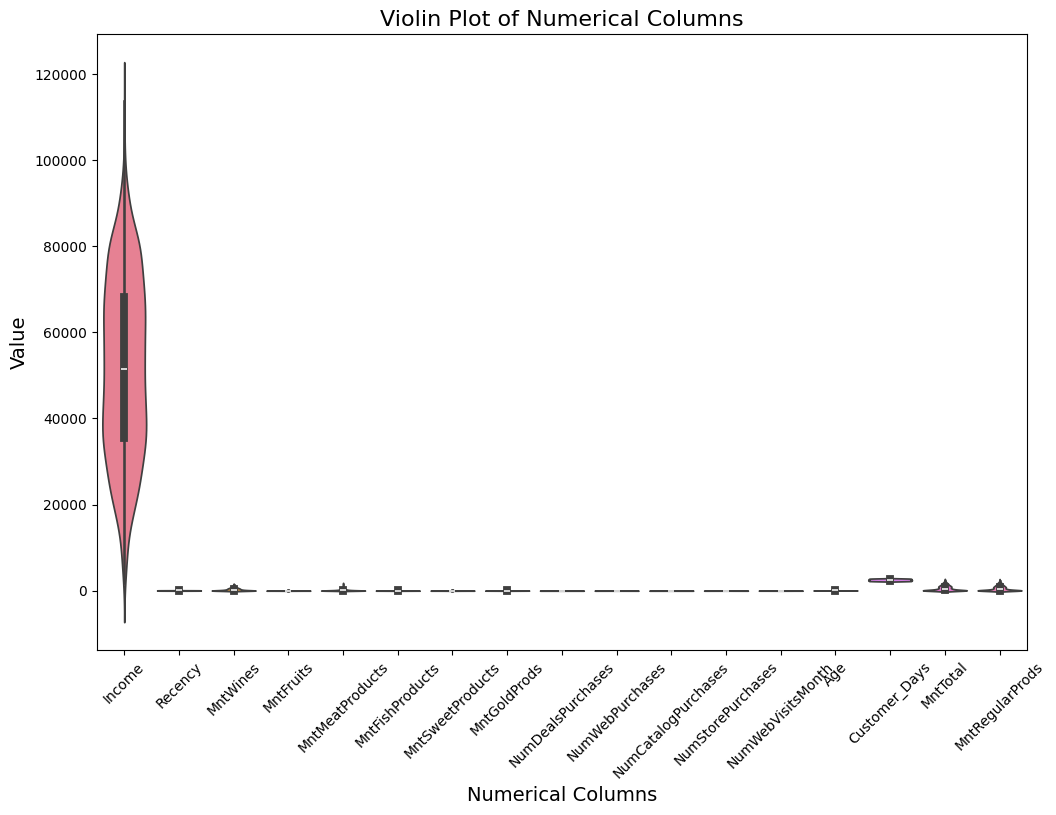

In [253]:
#data_no_dup.columns

# Numerical Variables
numerical_vars = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 
                  'MntTotal', 'MntRegularProds']


# Categorical Variables

binary_categorical_vars = ['Kidhome', 'Teenhome', 'Complain', 'marital_Married', 'marital_Single','marital_Divorced','marital_Together','marital_Widow',
                           'education_Graduation', 'education_Master', 'education_PhD','education_2n Cycle','education_Basic','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmpOverall']

marital_status = ['marital_Married', 'marital_Single','marital_Divorced','marital_Together','marital_Widow']

education_status =['education_2n Cycle','education_Basic','education_Graduation', 'education_Master', 'education_PhD']


# COnverting marital_status
label_encoder = LabelEncoder()

encoded_sums = {}

# Iterate over each column and encode its values
for column in marital_status:
    # Encode the values of the column
    encoded_values = label_encoder.fit_transform(data[column])
    # Sum the encoded values and store it in the dictionary
    encoded_sums[column] = encoded_values.sum()

# Convert the dictionary to a pandas Series
encoded_sums_series = pd.Series(encoded_sums)

#print(encoded_sums_series)

# Converting education_status
encoded_sums_education = {}

# Iterate over each column and encode its values
for column in education_status:
    # Encode the values of the column
    encoded_values_education = label_encoder.fit_transform(data[column])
    # Sum the encoded values and store it in the dictionary
    encoded_sums_education[column] = encoded_values_education.sum()

# Convert the dictionary to a pandas Series
encoded_sums_series_education = pd.Series(encoded_sums_education)

#print(encoded_sums_series_education)


# Visualizing Numerical Variables Distribution to check for skewness
# for var in numerical_vars:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data[var], kde=True, bins=30, color='skyblue')
#     plt.title(f'Distribution of {var}', fontsize=16)
#     plt.xlabel(var, fontsize=14)
#     plt.ylabel('Frequency', fontsize=14)
#     plt.grid(True)
#     plt.show()
    
# # Visualizing Numerical Variables Outliers

# for var in numerical_vars:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x=data[var], color='skyblue')
#     plt.title(f'Boxplot of {var}', fontsize=16)
#     plt.xlabel(var, fontsize=14)
#     plt.grid(True)
#     plt.show()

# # Visualizing Categorical Variables
# plt.figure(figsize=(10, 6))
# sns.barplot(x=encoded_sums_series.index, y=encoded_sums_series.values, palette='viridis')
# plt.title('Marital Status', fontsize=16)
# plt.xlabel('Marital Status', fontsize=14)
# plt.show()

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot violin plot for numerical columns
sns.violinplot(data=data[numerical_vars], ax=ax)

# Set plot title and labels
plt.title('Violin Plot of Numerical Columns', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


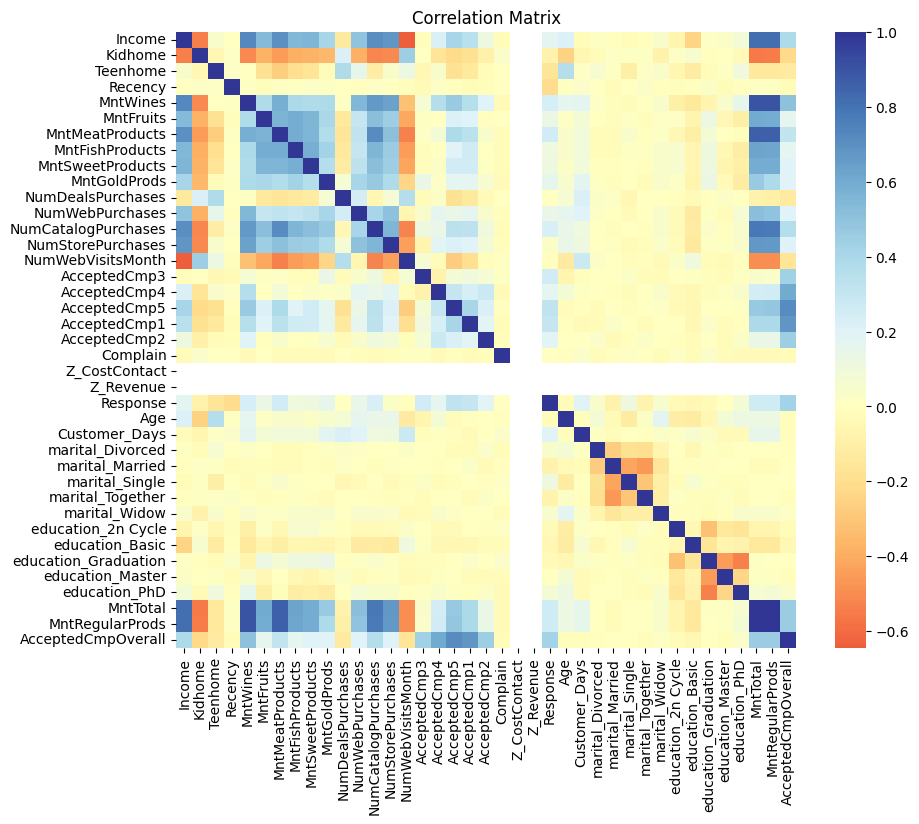

In [254]:
# Correlation Analysis
correlation_matrix = data_no_dup.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="RdYlBu", center=0)
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering: Data Transformation
### Skewness Correction

In [255]:
from scipy.stats import yeojohnson

# Apply winsorization to skewed numerical features
skewed_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 
                  'MntTotal', 'MntRegularProds']

# Apply Yeo-Johnson transformation to skewed numerical features
for feature in skewed_features:
    data[feature], _ = yeojohnson(data[feature] + 1)  # Adding 1 to avoid issues with zero values


# # Plot transformed features
# for var in skewed_features:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data[var], kde=True, bins=30, color='skyblue')
#     plt.title(f'Distribution of {var}', fontsize=16)
#     plt.xlabel(var, fontsize=14)
#     plt.ylabel('Frequency', fontsize=14)
#     plt.grid(True)
#     plt.show()


### Binning & Encoding

C:\Users\iamva\AppData\Local\Temp\ipykernel_167292\1056496240.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age', palette='viridis')


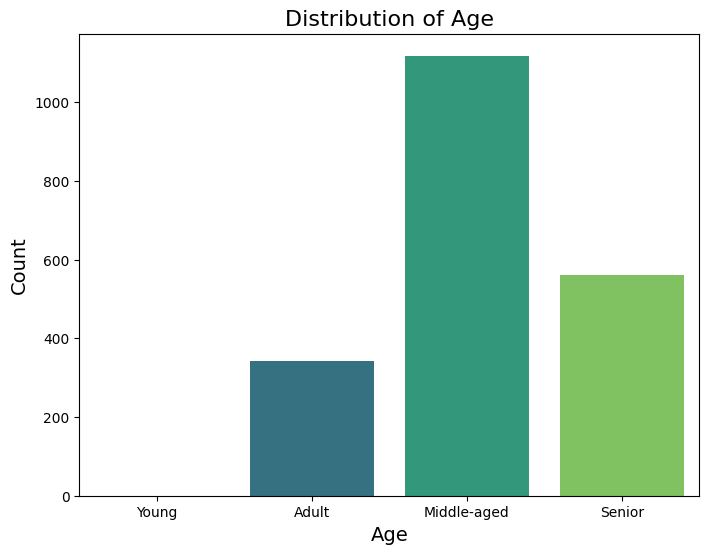

In [256]:
# Define the maximum income value
max_income = data['Income'].max()

# Define the bin edges
bin_edges = [0, 30000, 75000, max_income]

# Define the bin labels
bin_labels = ['Low', 'Average', 'High']

# Create the income_bins column using binning
data['Income'] = pd.cut(data['Income'], bins=bin_edges, labels=bin_labels, right=False)


# Define the bin edges
age_bin_edges = [0, 20, 40, 60, float('inf')]  # Define the age bins as [0-30], [31-50], [51-70], [71 and above]

# Define the bin labels
age_bin_labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create the age_bins column using binning
data['Age'] = pd.cut(data['Age'], bins=age_bin_edges, labels=age_bin_labels, right=False)

# # Plot count of income bins
# plt.figure(figsize=(8, 6))
# sns.countplot(data=data, x='income_bins', palette='viridis')
# plt.title('Distribution of Income Bins', fontsize=16)
# plt.xlabel('Income Bins', fontsize=14)
# plt.ylabel('Count', fontsize=14)
# plt.show()

# Plot count of age bins
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Age', palette='viridis')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


# Perform one-hot encoding on 'Age' and 'Income' columns
data = pd.get_dummies(data, columns=['Age', 'Income'], drop_first=False)


### Scaling

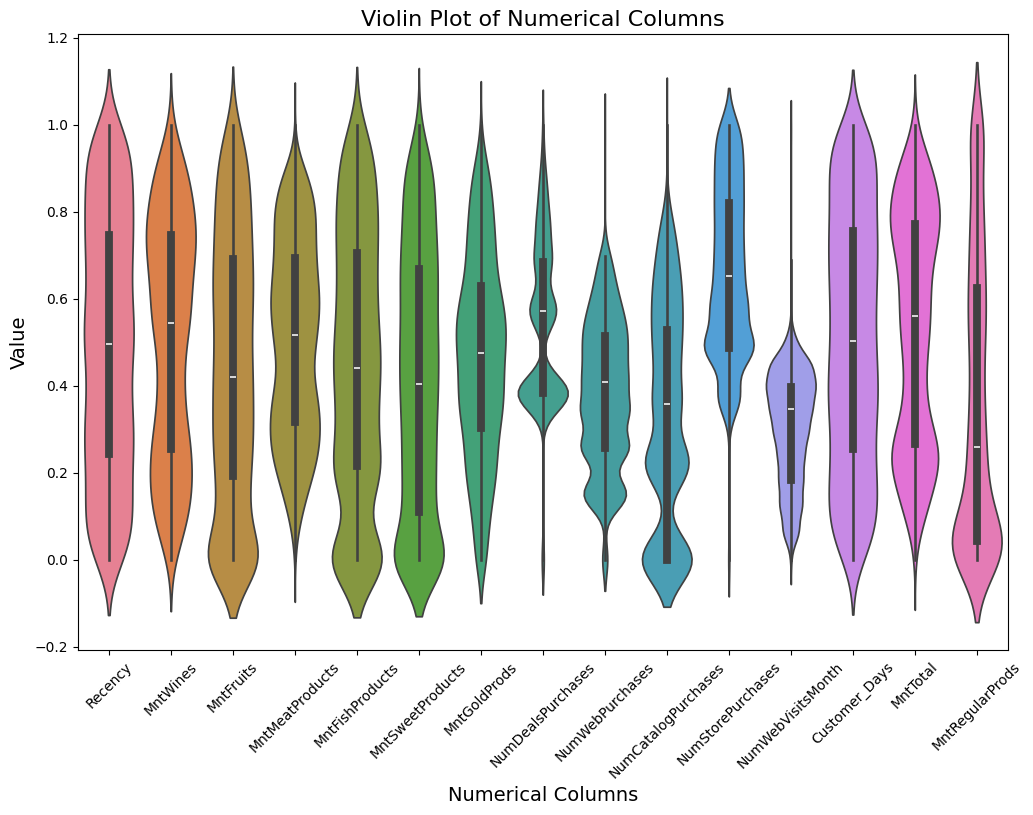

In [257]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import mstats
from sklearn.preprocessing import MinMaxScaler


# Select numerical columns for scaling
numerical_cols = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days', 
                  'MntTotal', 'MntRegularProds']


# Apply winsorization to the MntRegularProds column because of outliers
data['MntRegularProds'] = mstats.winsorize(data['MntRegularProds'], limits=[0.05, 0.05])


# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the numerical columns
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot violin plot for numerical columns
sns.violinplot(data=data[numerical_cols], ax=ax)

# Set plot title and labels
plt.title('Violin Plot of Numerical Columns', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


## Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target
X = data.drop(columns=['Response'])
y = data['Response']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

num_samples = data.shape[0]
print("Total number of samples in the dataset:", num_samples)

### Filter Method

In [264]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

# 2. Pearson's Correlation
# Calculate Pearson's correlation coefficient
correlation = X.corrwith(y)

# Set a threshold for correlation coefficient
correlation_threshold = 0.1  # Set the threshold as needed

# Select features with correlation coefficients above the threshold
selected_features_corr = correlation[abs(correlation) > correlation_threshold].index.tolist()

# 3. Mutual Information
# Initialize the mutual information selector
selector_mi = SelectKBest(mutual_info_classif, k=5)  # Select the number of top features (k) as needed

# Fit the selector to your data
X_selected_mi = selector_mi.fit_transform(X, y)

# Get the indices of selected features
selected_features_mi = X.columns[selector_mi.get_support()]

# Print selected features for each method
print("Selected Features using Pearson's Correlation:", selected_features_corr)
print("Selected Features using Mutual Information:", selected_features_mi)

c:\Users\iamva\.vscode\projects\Predictive-Analysis-Pipeline\.venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\iamva\.vscode\projects\Predictive-Analysis-Pipeline\.venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Selected Features using Pearson's Correlation: ['Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Customer_Days', 'marital_Single', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'Income_Average', 'Income_High']
Selected Features using Mutual Information: Index(['MntMeatProducts', 'AcceptedCmp5', 'AcceptedCmp1', 'MntTotal',
       'AcceptedCmpOverall'],
      dtype='object')


### Wrapped Method

In [268]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
estimator = LogisticRegression()

# Initialize the RFE selector with the model and desired number of features to select
selector_rfe = RFE(estimator, n_features_to_select=5, step=1)

# Fit the RFE selector to your data
selector_rfe.fit(X, y)

# Get the indices of selected features
selected_features_rfe = X.columns[selector_rfe.support_]

# Print selected features
print("Selected Features using Recursive Feature Elimination (RFE):", selected_features_rfe)



Selected Features using Recursive Feature Elimination (RFE): Index(['Recency', 'MntMeatProducts', 'NumStorePurchases', 'Customer_Days',
       'AcceptedCmpOverall'],
      dtype='object')


In [270]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize the RFE selector with the Random Forest classifier and desired number of features to select
selector_rfe_rf = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)

# Fit the RFE selector to your data
selector_rfe_rf.fit(X_train, y_train)

# Get the indices of selected features
selected_features_rfe_rf = X_train.columns[selector_rfe_rf.support_]

# Print selected features
print("Selected Features using RFE with Random Forest:", selected_features_rfe_rf)


Selected Features using RFE with Random Forest: Index(['Recency', 'MntMeatProducts', 'Customer_Days', 'MntTotal',
       'AcceptedCmpOverall'],
      dtype='object')


In [273]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(random_state=42)

# Step 4: Choose and Initialize Wrapper Method (RFE)
selector_rfe = RFE(gbm_classifier, n_features_to_select=5, step=1)

# Step 5: Fit Wrapper to Data
selector_rfe.fit(X_train, y_train)

# Step 6: Get Selected Features
selected_features_rfe = X.columns[selector_rfe.support_]

# Print selected features
print("Selected Features using Recursive Feature Elimination (RFE):", selected_features_rfe)

Selected Features using Recursive Feature Elimination (RFE): Index(['Recency', 'MntMeatProducts', 'Customer_Days', 'MntTotal',
       'AcceptedCmpOverall'],
      dtype='object')


### Model Testing

Accuracy: 0.8864197530864197
Precision: 0.7666666666666667
Recall: 0.3709677419354839
F1 Score: 0.5
ROC AUC Score: 0.8715085112385969


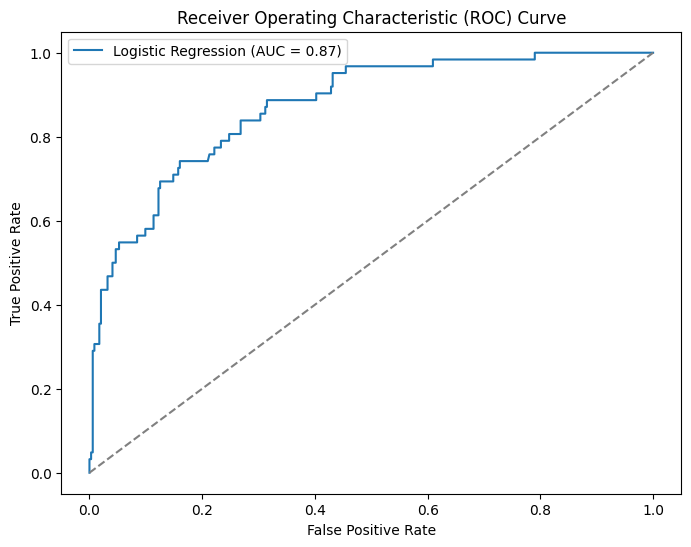

Confusion Matrix:
[[336   7]
 [ 39  23]]


In [271]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


# Select features and target
X = data[['Recency', 'NumStorePurchases', 'MntMeatProducts', 'Customer_Days','AcceptedCmpOverall']]
y = data['Response']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: Accuracy measures the overall correctness of the model's predictions. In this case, the accuracy is approximately 88.64%, indicating that around 88.64% of the predictions made by the model are correct.

Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. In this case, the precision is approximately 76.67%, indicating that when the model predicts a positive outcome (accepted offer), it is correct around 76.67% of the time.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that are correctly identified by the model. In this case, the recall is approximately 37.10%, indicating that the model correctly identifies around 37.10% of all actual positive instances (accepted offers).

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1 score is 50%, which indicates the harmonic mean of precision and recall.

ROC AUC Score: ROC AUC (Receiver Operating Characteristic Area Under the Curve) measures the area under the ROC curve, which plots the true positive rate against the false positive rate. A higher ROC AUC score indicates better discrimination between positive and negative classes. In this case, the ROC AUC score is approximately 87.15%, indicating good discrimination ability of the model.

Confusion Matrix: The confusion matrix provides a tabular representation of actual vs. predicted values. It shows the counts of true negatives (top left), false positives (top right), false negatives (bottom left), and true positives (bottom right). In this case:

True Negatives (TN): 336
False Positives (FP): 7
False Negatives (FN): 39
True Positives (TP): 23
This information helps in understanding the performance of the model across different classes and identifying potential areas of improvement.

In [272]:
from sklearn.ensemble import RandomForestClassifier

X = data[['Recency', 'MntMeatProducts', 'Customer_Days', 'MntTotal', 'AcceptedCmpOverall']]

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Print Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8567901234567902
Precision: 0.5416666666666666
Recall: 0.41935483870967744
F1 Score: 0.4727272727272727
ROC AUC Score: 0.6776074485093578
Confusion Matrix:
 [[321  22]
 [ 36  26]]


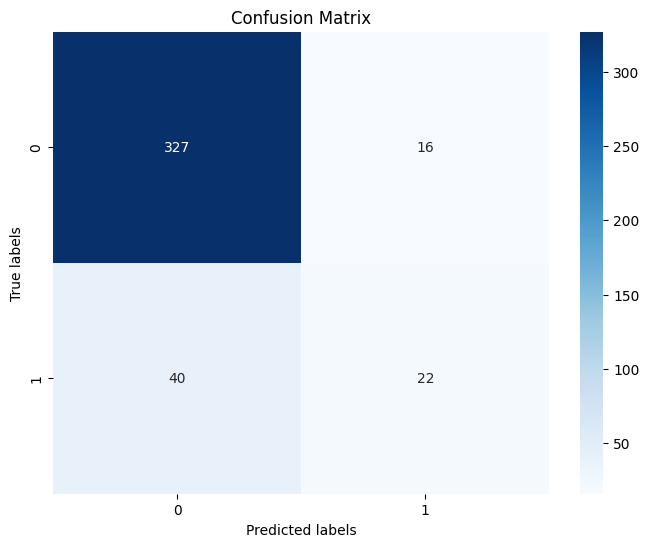

Accuracy: 0.8617283950617284
Precision: 0.5789473684210527
Recall: 0.3548387096774194
F1 Score: 0.44
ROC AUC Score: 0.6540957396783599


In [274]:

# Step 2: Split Data 
# Select features and target
X = data[['Recency', 'MntMeatProducts', 'Customer_Days', 'MntTotal',
       'AcceptedCmpOverall']]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 3: Initialize GBM Classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Step 4: Train the Model
gbm_classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = gbm_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 7: Visualize Results
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

In [275]:
from sklearn.svm import SVC


X = data.drop(columns=['Response'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # You can specify different kernels if needed

# Initialize the RFE selector with the SVM model and desired number of features to select
selector_rfe = RFE(estimator=svm_model, n_features_to_select=5, step=1)

# Fit the RFE selector to your training data
selector_rfe.fit(X_train, y_train)

# Get the indices of selected features
selected_features_rfe = X.columns[selector_rfe.support_]

# Print selected features
print("Selected Features using Recursive Feature Elimination (RFE):", selected_features_rfe)

# Evaluate the SVM model with selected features
svm_model.fit(X_train[selected_features_rfe], y_train)
y_pred = svm_model.predict(X_test[selected_features_rfe])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features using Recursive Feature Elimination (RFE): Index(['Recency', 'MntMeatProducts', 'NumStorePurchases', 'Customer_Days',
       'AcceptedCmpOverall'],
      dtype='object')
Accuracy: 0.8740740740740741


In [277]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Initialize the SelectKBest selector with mutual information scoring
selector_kbest = SelectKBest(mutual_info_classif, k=5)  # Select the number of top features (k) as needed

# Fit the selector to your training data
X_train_selected = selector_kbest.fit_transform(X_train, y_train)

# Get the indices of selected features
selected_features_kbest = X.columns[selector_kbest.get_support()]

# Print selected features
print("Selected Features using SelectKBest with Mutual Information:", selected_features_kbest)

# Evaluate the kNN model with selected features
knn_model.fit(X_train[selected_features_kbest], y_train)
X_test_selected = selector_kbest.transform(X_test)
y_pred = knn_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features using SelectKBest with Mutual Information: Index(['MntMeatProducts', 'AcceptedCmp5', 'AcceptedCmp1', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')
Accuracy: 0.8469135802469135


c:\Users\iamva\.vscode\projects\Predictive-Analysis-Pipeline\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The best performing Model in this case is the Logistic Regression

## Hyperparameter Tuning & Cross Validation

In [284]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Select features and target
X = data[['Recency', 'NumStorePurchases', 'MntMeatProducts', 'Customer_Days', 'AcceptedCmpOverall']]
y = data['Response']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Logistic Regression model
lr = LogisticRegression()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
best_score = grid_search.best_score_
print("Best Score (Mean cross-validated score):", best_score)

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)




Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score (Mean cross-validated score): 0.882433207201009
Test Accuracy: 0.8888888888888888
